In [1]:
import findspark
findspark.init()

from __future__ import print_function

from pyspark.ml.regression import LinearRegression # where the new dataframe API lives

from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors # for feature data

if __name__ == "__main__":

    # Create a SparkSession (Note, the config section is only for Windows!)
    spark = SparkSession.builder.config("spark.sql.warehouse.dir", "file:///C:/temp").appName("LinearRegression").getOrCreate()

    # Load up our data and convert it to the format MLLib expects.
    inputLines = spark.sparkContext.textFile("regression.txt")
    data = inputLines.map(lambda x: x.split(",")).map(lambda x: (float(x[0]), Vectors.dense(float(x[1]))))

    # Convert this RDD to a DataFrame
    colNames = ["label", "features"]
    df = data.toDF(colNames)

    # Note, there are lots of cases where you can avoid going from an RDD to a DataFrame.
    # Perhaps you're importing data from a real database. Or you are using structured streaming
    # to get your data.

    # Let's split our data into training data and testing data
    trainTest = df.randomSplit([0.5, 0.5])
    trainingDF = trainTest[0]
    testDF = trainTest[1]

    # Now create our linear regression model
    lir = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

    # Train the model using our training data
    model = lir.fit(trainingDF)

    # Now see if we can predict values in our test data.
    # Generate predictions using our linear regression model for all features in our
    # test dataframe:
    fullPredictions = model.transform(testDF).cache()

    # Extract the predictions and the "known" correct labels.
    predictions = fullPredictions.select("prediction").rdd.map(lambda x: x[0])
    labels = fullPredictions.select("label").rdd.map(lambda x: x[0])

    # Zip them together
    predictionAndLabel = predictions.zip(labels).collect()
    x = []
    y = []
    # Print out the predicted and actual values for each point
    for prediction in predictionAndLabel:
        print(prediction)
        x.append(float(prediction[0]))
        y.append(float(prediction[1]))

    # Stop the session
    spark.stop()


(-1.83706704073054, -2.58)
(-1.7088457046293748, -2.54)
(-1.8798074860975953, -2.36)
(-1.4096625870599888, -2.09)
(-1.388292364376461, -1.94)
(-1.4167859946211645, -1.94)
(-1.3526753265705818, -1.88)
(-1.238700805591768, -1.79)
(-1.1888369526635372, -1.74)
(-1.1745901375411854, -1.66)
(-1.2315773980305924, -1.61)
(-1.0392453938788442, -1.58)
(-1.1817135451023613, -1.58)
(-1.1176028770517787, -1.57)
(-1.0107517636341408, -1.46)
(-1.1389730997353062, -1.42)
(-0.9466410955835581, -1.39)
(-0.8967772426553271, -1.37)
(-0.9323942804612064, -1.34)
(-0.8184197594823927, -1.29)
(-0.854036797288272, -1.23)
(-0.8611602048494478, -1.22)
(-0.7970495367988651, -1.2)
(-0.8611602048494478, -1.2)
(-0.8896538350941512, -1.17)
(-0.8967772426553271, -1.17)
(-0.7899261292376893, -1.12)
(-0.7756793141153376, -1.1)
(-0.6118409402082928, -1.03)
(-0.7685559065541617, -1.03)
(-0.6617047931365239, -1.01)
(-0.7828027216765134, -0.99)
(-0.6545813855753481, -0.97)
(-0.7614324989929858, -0.96)
(-0.6047175326471169, 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

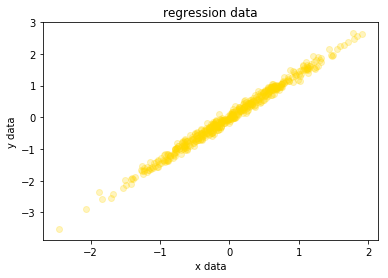

In [12]:
plt.scatter(x,y, alpha= 0.25, color='gold')
plt.xlabel("x data")
plt.ylabel("y data")
plt.title("regression data")
plt.show()